In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Model Definition

In [7]:
class AdaptiveControl:
    def __init__(self, Kp=0.01, setpoint=60, adj_min=-0.5, adj_max=0.5):
        self.Kp = Kp
        self.setpoint = setpoint
        self.adj_min = adj_min
        self.adj_max = adj_max

    def calcDifficulty(self, timestamp_delta, prev_difficulty):
        e = self.setpoint - timestamp_delta
        
        adj_factor = self.Kp * e
        
        adj_factor = max(adj_factor, self.adj_min)
        adj_factor = min(adj_factor, self.adj_max)
        
        # This is not really standard
        difficulty = (1+adj_factor) * prev_difficulty

        return difficulty

In [24]:
class SystemResponse:
    def __init__(self):
        pass
    
    def getHashPower(self, block_idx):
        parts = {
            20 : 250,
            30 : 600,
            40 : 1000,
            60 : 500,
            100 : 500 + (block_idx*5),
            150 : max( 900-(block_idx), 0)
        }
        
        for k, v in parts.items():
            if block_idx < k:
                return v
        
        return 250
    
    def calcSolutionTime(self, difficulty, block_idx):
        hash_power = self.getHashPower(block_idx)
        
        mean = difficulty / hash_power
#        sd = (difficulty*(difficulty-1)/hash_power**2)**0.5      ??
        sd = 1
        
        return np.random.normal(mean, sd)

## Create Model

In [25]:
ac = AdaptiveControl()
miner = SystemResponse()

## Run Model

In [28]:
difficulty = 5000

historic_difficulty = []
historic_delta = []
historic_hashpower = []

window_size = 5

for block_idx in range(200):
    timestamp_delta = miner.calcSolutionTime(difficulty, block_idx)

    historic_hashpower.append(miner.getHashPower(block_idx))
    historic_difficulty.append(difficulty)
    historic_delta.append(timestamp_delta)

    window_data = historic_delta[-window_size:]
    mean_delta = np.mean(window_data)
    
    #print(mean_delta, window_data)
    
    difficulty = ac.calcDifficulty(timestamp_delta = timestamp_delta, 
                                   prev_difficulty = difficulty)
    

## Plots

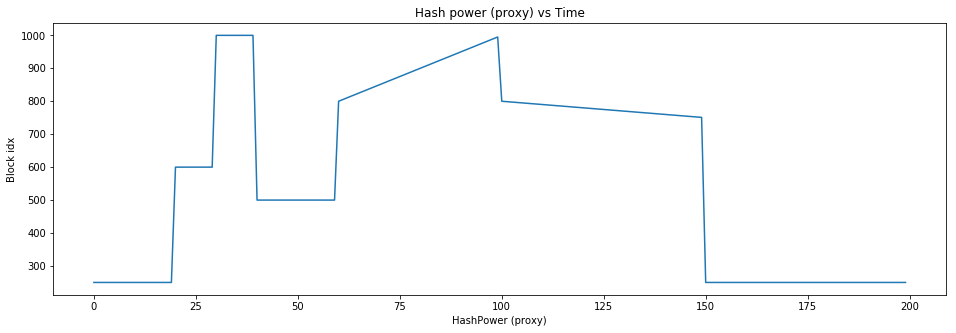

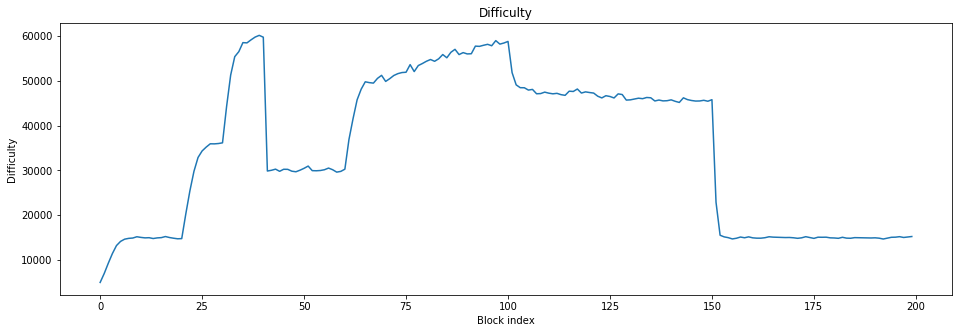

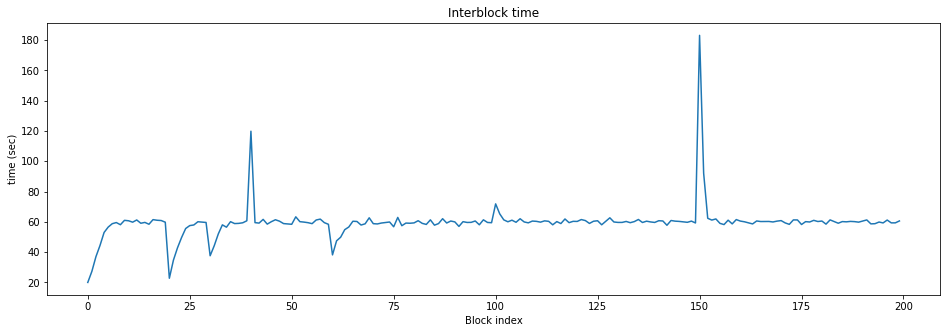

In [29]:
plt.figure(figsize=(16,5))
plt.plot(historic_hashpower)
plt.title("Hash power (proxy) vs Time")
plt.xlabel("HashPower (proxy)")
plt.ylabel("Block idx")
plt.show()

# Plot Time vs Difficulty
plt.figure(figsize=(16,5))
plt.plot(historic_difficulty)
plt.title("Difficulty")
plt.ylabel("Difficulty")
plt.xlabel("Block index")
plt.show()

plt.figure(figsize=(16,5))
plt.plot(historic_delta)
plt.title("Interblock time")
plt.ylabel("time (sec)")
plt.xlabel("Block index")

plt.show()
